One we've seen the pipeline function we can take a look behind and find how we can transform and adapt the models to our use cases.

In order to do this we will take a look at the tokenizer and the model class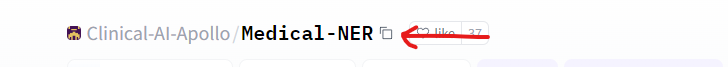

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

This will give us a very generic classes but for some use cases is better to look at the doucmentation as tokenizers may differ from one another.

Let's see how this classes work:



In [12]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Now that we have a specific model we can use this model to perform the task at hand. Let's keep in mind that not all models can perform all tasks and that some of them are trained for a specific task. As we've loaded one that is generic we can still use it for any task

In [14]:
classifier = pipeline("sentiment-analysis",model=model_name,tokenizer=tokenizer)
res = classifier("I love AI")
print(res)

[{'label': 'POSITIVE', 'score': 0.9998302459716797}]


So, as we can see unde the hood of pipeline what we have is a model and a tokenizer for that model. Let's take a look at the tokenizer to see what is it doing

In [15]:
sequence = "The monkey climbs the tree using chat-gpt for moving the branches"
res = tokenizer(sequence)
print(res)
tokens = tokenizer.tokenize(sequence)
print(tokens)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)
decoded_strings = tokenizer.decode(ids)
print(decoded_strings)

{'input_ids': [101, 1996, 10608, 18881, 1996, 3392, 2478, 11834, 1011, 14246, 2102, 2005, 3048, 1996, 5628, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['the', 'monkey', 'climbs', 'the', 'tree', 'using', 'chat', '-', 'gp', '##t', 'for', 'moving', 'the', 'branches']
[1996, 10608, 18881, 1996, 3392, 2478, 11834, 1011, 14246, 2102, 2005, 3048, 1996, 5628]
the monkey climbs the tree using chat - gpt for moving the branches


When we apply the tokenizer directly we get this dictionary:

{'input_ids': [101, 1996, 10608, 18881, 1996, 3392, 2478, 11834, 1011, 14246, 2102, 2005, 3048, 1996, 5628, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In here the attention mask key indicates wether the mechanism of attention should use or ignore the token.

Then we can see that .tokenize returns the tokens and convert_tokens_to_ids returns the id of the token and .decode returns from the ids the original string.

Also taking a look at the ids we can take a look at the start and end of input_ids and we compare it with the convert_to_token_ids we have an extra 101 and 102 which means for the transformers a token as beggining of sentence and end of sentence.

[1996, 10608, 18881, 1996, 3392, 2478, 11834, 1011, 14246, 2102, 2005, 3048, 1996, 5628]

Ok, Now let's see how we can combine the code with pytorch or tensorflow

In [16]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.0 MB/s eta 0:00:00


In [17]:
import torch
import torch.nn.functional as F

In [20]:
X_train = ["I've been waiting for a HuggingFace course my whoel life.",
           "Python is great!"]

res = classifier(X_train)
print(res)

#In pytorch

batch = tokenizer(X_train,padding=True,truncation=True,max_length=512,return_tensors="pt")
print(batch)

with torch.no_grad():
  outputs = model(**batch)
  print(f"OUTPUTS: {outputs}")
  predictions = F.softmax(outputs.logits, dim=1)
  print(f"PREDICTIONS: {predictions}")
  labels = torch.argmax(predictions,dim=1)
  print(f"LABELS: {labels}")



[{'label': 'NEGATIVE', 'score': 0.5572958588600159}, {'label': 'POSITIVE', 'score': 0.9998615980148315}]
{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2040,  2884,  2166,  1012,   102],
        [  101, 18750,  2003,  2307,   999,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}
OUTPURS: SequenceClassifierOutput(loss=None, logits=tensor([[ 0.2255, -0.0047],
        [-4.2745,  4.6111]]), hidden_states=None, attentions=None)
PREDICTIONS: tensor([[5.5730e-01, 4.4270e-01],
        [1.3835e-04, 9.9986e-01]])
LABELS: tensor([0, 1])


Althought the output is a little bit messier than before we can see that we have the same.

in the outputs we have a dictionary in which we have tensors as we've specified that we wanted tensors in the return_tensors argument to work directly with pytorch, otherwise this would be a list.

Then in the Predictions we have again a tensor in which we can see we have the same values for the inference

0.557295 vs. 5.5730e-01
0.99986159 vs. 9.9986e-01

Al igual que en labels las cuales vienen en binario al ser un problema de clasificación binaria:

tensor([0, 1]) vs. Negative and Positive

Let's take a look at how we would save or load a model

In [21]:
# Save
save_directory = "saved"
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)

#Load
tok = AutoTokenizer.from_pretrained(save_directory)
mod = AutoModelForSequenceClassification.from_pretrained(save_directory)

In order to use the model Hub you can filter using the different options and normally there will be examples of code or different ways that you can use that model and download it. If not you can always try to use the generic way to do it and copy the name from the HUb and paste it in the model_name



Vamos a ver cómo fine-tunear un modelo con un dataset de manera introductoria

In [ ]:
#1 preparar el dataset
#2 load pretrained TOkenizer, call it with dataset -> encoding
#3. Build Pytorch Dataset with encodings
#4. Load Pretrained model
#5. a) Load trainer and train
#   b) native Pytorch training loop


from transformers import Trainer, TrainingArguments

training_args = TrainingArguments("test-trainer")

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    data_collator=data_collator,
    tokenizer=tokenizer
)

trainer.train()